In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mesa

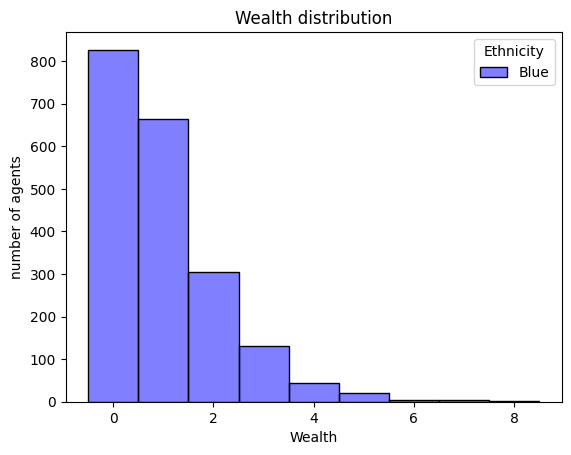

In [9]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_agents
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B


class MoneyAgent(mesa.Agent):

    def __init__(self, model, ethnicity):
        super().__init__(model)
        self.wealth = 1
        self.ethnicity = ethnicity

    def give_money(self, similars):
        if self.wealth > 0:
            other_agent = self.random.choice(similars)
            other_agent.wealth += 1
            self.wealth -= 1

class MoneyModel(mesa.Model):

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        #Create a list of our different ethnicities
        ethnicities = ["Green", "Blue", "Mixed"]

        #Create agents
        MoneyAgent.create_agents(
            model=self, n=n, ethnicity=self.random.choice(ethnicities)
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": "wealth", "Ethnicity": "ethnicity"},
        )

    def step(self):
        self.datacollector.collect(self)
        # groupby returns a dictionary of
        # key: ethnicity and value: list of agents with that ethnicity
        grouped_agents = model.agents.groupby("ethnicity")

        for ethnic, similars in grouped_agents:
            if ethnic != "Mixed":
                similars.shuffle_do("give_money", similars)
            else:
                similars.shuffle_do(
                    "give_money", self.num_agents
                ) # This allows mixed to trade with everyone



# Run the model
model = MoneyModel(100)
for _ in range(20):
    model.step()

# get the data
data = model.datacollector.get_agent_vars_dataframe()
# assign histogram colors
palette = {"Green": "green", "Blue": "blue", "Mixed": "purple"}
g = sns.histplot(data=data, x="Wealth", hue="Ethnicity", discrete=True, palette=palette)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");